# Mid-Term Project

Rishabh Kaushick,   NU ID: 002808996,   kaushick.r@northeastern.edu

College of Engineering, 
Northeastern University
Toronto, ON

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# loading the data
# structured data
scm_dataset_path = 'data/DataCoSupplyChainDataset.csv'
scm_df = pd.read_csv(scm_dataset_path, encoding='latin-1')

# unstructured data
scm_unstructured_path = 'data/tokenized_access_logs.csv'
scm_unstructured_df = pd.read_csv(scm_unstructured_path)

In [3]:
# Let's see what the first five rows data looks like
scm_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
# total number of rows in the above csv:
scm_df.count()

Type                             180519
Days for shipping (real)         180519
Days for shipment (scheduled)    180519
Benefit per order                180519
Sales per customer               180519
Delivery Status                  180519
Late_delivery_risk               180519
Category Id                      180519
Category Name                    180519
Customer City                    180519
Customer Country                 180519
Customer Email                   180519
Customer Fname                   180519
Customer Id                      180519
Customer Lname                   180511
Customer Password                180519
Customer Segment                 180519
Customer State                   180519
Customer Street                  180519
Customer Zipcode                 180516
Department Id                    180519
Department Name                  180519
Latitude                         180519
Longitude                        180519
Market                           180519


In [5]:
scm_unstructured_df.head()

,Product,Category,Date,Month,Hour,Department,ip,url
0,adidas Brazuca 2017 Official Match Ball,baseball & softball,9/1/2017 6:00,Sep,6,fitness,37.97.182.65,/department/fitness/category/baseball%20&%20so...
1,The North Face Women's Recon Backpack,hunting & shooting,9/1/2017 6:00,Sep,6,fan shop,206.56.112.1,/department/fan%20shop/category/hunting%20&%20...
2,adidas Kids' RG III Mid Football Cleat,featured shops,9/1/2017 6:00,Sep,6,apparel,215.143.180.0,/department/apparel/category/featured%20shops/...
3,Under Armour Men's Compression EV SL Slide,electronics,9/1/2017 6:00,Sep,6,footwear,206.56.112.1,/department/footwear/category/electronics/prod...
4,Pelican Sunstream 100 Kayak,water sports,9/1/2017 6:01,Sep,6,fan shop,136.108.56.242,/department/fan%20shop/category/water%20sports...


In [6]:
scm_unstructured_df.count()

Product       469977
Category      469977
Date          469977
Month         469977
Hour          469977
Department    469977
ip            469977
url           469977
dtype: int64

In the main csv dataset, there are 53 columns and 180,519 rows. Therefore there are 53 X 180,519 = 9,567,507 data points.


However, from the unstructured dataset, we can see that there are 8 columns and 469,977 rows. Therefore there are 8 X 469,977 = 3,759,816 data points.


Since the columns in each of the datasets are different from each other, and since there is a lot more data in the structured dataframe, we will use the same and disregard the unstructured data in this project.

In [7]:
# Let's see the type of data in the 'Type' Column
scm_df['Type'].value_counts()

Type
DEBIT       69295
TRANSFER    49883
PAYMENT     41725
CASH        19616
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x16b985550>,
 [Text(0.428168266257398, 1.1210137982068438, 'DEBIT'),
  Text(-1.1885215498911712, -0.16557936297826523, 'TRANSFER'),
  Text(0.19342361628901053, -1.1843087877161436, 'PAYMENT'),
  Text(1.130752535999951, -0.40174457349126647, 'CASH')])

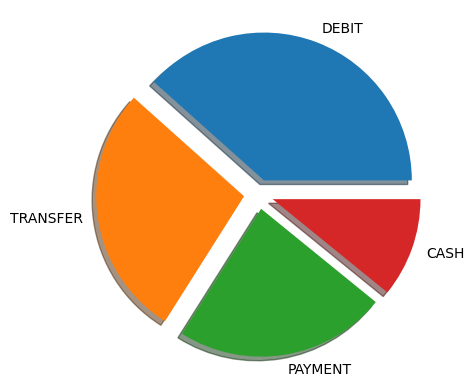

In [8]:
# visualizing the same thing in a pie chart

# Trying to create a plot with each section exploded from the pie.
my_explode = [0.1, 0.1, 0.1, 0.1]
my_labels = np.array(['DEBIT', 'TRANSFER', 'PAYMENT', 'CASH'])
type_value_array = (scm_df['Type'].value_counts())
plt.pie(type_value_array, labels=my_labels, shadow=True, explode=my_explode)

In [9]:
# Delivery Status
scm_df['Delivery Status'].value_counts()

Delivery Status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64

Text(0.5, 1.0, 'Frequency Distribution of Delivery Status')

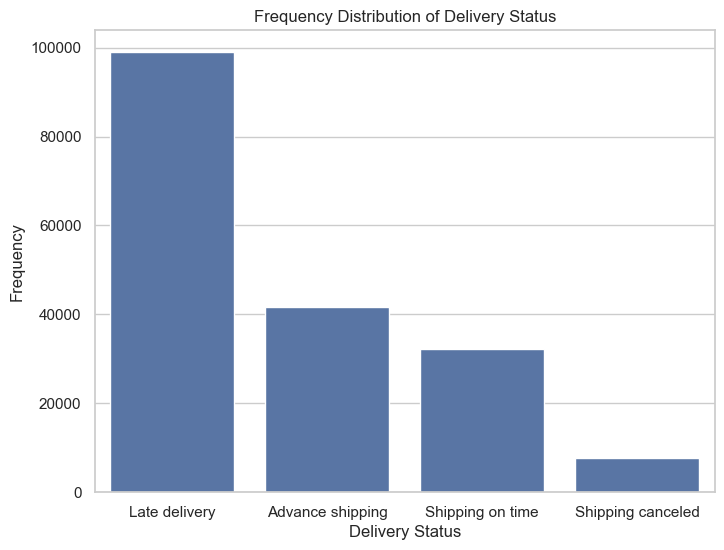

In [10]:
# plotting it in a graph to visualize it better
sns.set(style="whitegrid")
plt.figure(figsize = (8,6))
sns.barplot(scm_df['Delivery Status'].value_counts())
plt.xlabel("Delivery Status")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Delivery Status")

In [ ]:
# Customer Segment

In [ ]:
# Market

In [ ]:
# Order Status

In [ ]:
# Product Status

In [ ]:
# Shipping Mode

In [ ]:
# columns to remove

In [ ]:
# finding correlations

In [ ]:
# Data Visualization
# plotting multiple features against each other